# Experiment with similarity-centric analogous cycles at birthtime of Witness cycles

In [1]:
using Pkg
Pkg.activate("../../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`


In [2]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var


WebIO._IJuliaInit()

In [8]:
using DelimitedFiles
using Plots
using CSV
using Distances
using HDF5
using FileIO

# 1. Load data 

In [10]:
data = load("data/torus_confused_circle/data.jld")
P = data["circle"] # 3-dimensional coordinates
P_theta = data["circle_theta"]
P_phi = data["circle_phi"]
Q = data["torus"] # 3-dimensional coordinates
Q_theta = data["torus_theta"]
Q_phi = data["torus_phi"];

# print number of points 
print("number of points in P: ", size(P,1), "\n")
print("number of points in Q: ", size(Q,1))
     

number of points in P: 70
number of points in Q: 300

Plot points on 3D

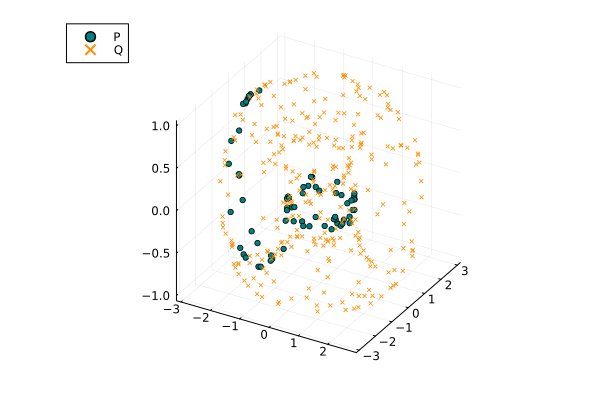

In [11]:
plot_3D(P, Q, P_markersize = 3, Q_markersize = 2)

Plot the points on a square torus. Assume that the sides of the squares have been identified to represent a torus

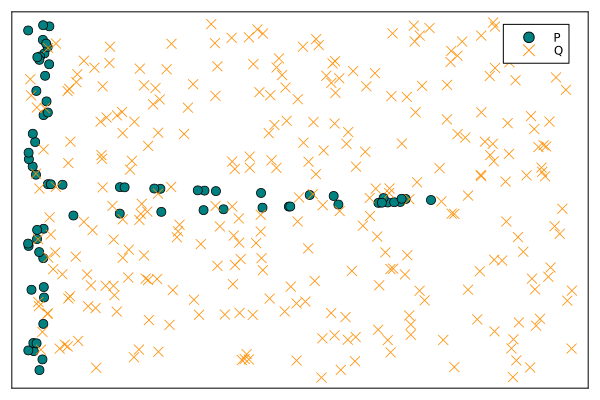

In [12]:
P_2d = hcat(P_theta, P_phi)
Q_2d = hcat(Q_theta, Q_phi)

p = plot_P_Q(P_2d, Q_2d)

In [13]:
# compute distance
D_P, D_Q, D_P_Q, D_Q_P = compute_distance(P, Q);

In [17]:
# Compute Vietoris-Rips persistence on two regions
dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim);
#W_Q = compute_Witness_persistence(D_Q_P, maxdim = dim);

In [18]:
# plot all PD
barcode_VR_P = barcode(VR_P, dim = 1)
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
#barcode_W_Q = barcode(W_Q["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1);

In [20]:
selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_VR_Q)

([83, 85], 0.8683703161262092)

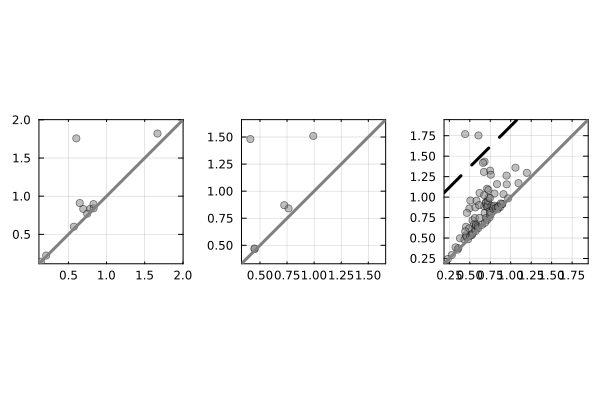

In [21]:
# plot all PD
p1 = plot_PD(barcode_VR_P)
p2 = plot_PD(barcode_W_P)
p3 = plot_PD(barcode_VR_Q, cutoff = cutoff_Q)
plot(p1, p2, p3, layout = grid(1,3))

Run similarity-centric analogous bars at birthtime of witness cycle

In [22]:
extension_P, extension_Q = run_similarity_analogous_birthtime(
                                            VR_P = VR_P,
                                            D_P = D_P,
                                            VR_Q = VR_Q,
                                            D_Q = D_Q,
                                            W_PQ = W_P,
                                            W_PQ_bar = 2
                                            );

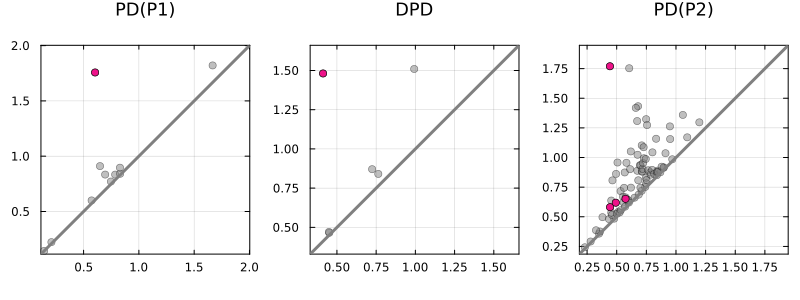

In [23]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 2

# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = extension_P["Ybar_rep_tau"],
            title = "PD(P1)", 
            titlefontsize = 12)

p2 = plot_PD(barcode_W_P; 
            highlight = [witness_idx],
            title = "DPD", 
            titlefontsize = 12)

p3 = plot_PD(barcode_VR_Q; 
            highlight = extension_Q["Ybar_rep_tau"],
            title = "PD(P2)", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

In [24]:
extension_P["Ybar_rep_tau"]

1-element Vector{Int64}:
 11

In [25]:
print(extension_Q["Ybar_rep_tau"])

# find the bars that are "significant"
println([i for i in extension_Q["Ybar_rep_tau"] if i in selected_Q])

[32, 83, 67, 21][83]


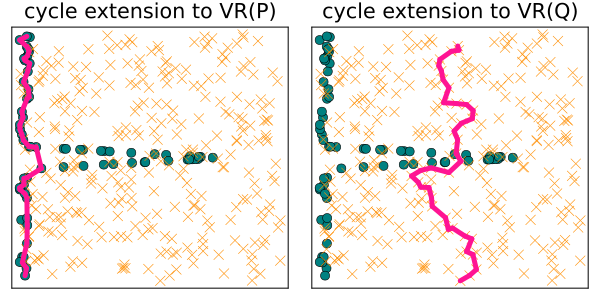

In [28]:
# select baseline cycle extension in P
cr_P = get_cyclerep_Eirene(VR_P, 11)
cr_Q = get_cyclerep_Eirene(VR_Q, 83)

p1 = plot_cycle_square_torus(P_2d, Q_2d, cycle = cr_P, cycle_loc = "P", title = "cycle extension to VR(P)"; legend = false)
p2 = plot_cycle_square_torus(P_2d, Q_2d, cycle = cr_Q, cycle_loc = "Q", title = "cycle extension to VR(Q)"; legend = false)

plot(p1, p2, layout = grid(1,2), size = (600, 300))